# Parkinson's Disease Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls

drive  sample_data


In [ ]:
os.chdir('drive/MyDrive/project')

In [ ]:
! ls

100_spiral_model.h5  spiral  spiral_data


In [ ]:
import os
import cv2
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
plt.style.use('dark_background')

### Splitting dataset

In [ ]:
cur_dir = os.getcwd()

base_dir = os.path.join(cur_dir, 'spiral_data')
# os.mkdir(base_dir) #make base directory

In [ ]:
!ls

100_spiral_model.h5  spiral  spiral_data


In [ ]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_h_dir = os.path.join(train_dir, 'healthy')
# os.mkdir(train_h_dir)

train_p_dir = os.path.join(train_dir, 'parkinson')
# os.mkdir(train_p_dir)

validation_h_dir = os.path.join(validation_dir, 'healthy')
# os.mkdir(validation_h_dir)

validation_p_dir = os.path.join(validation_dir, 'parkinson')
# os.mkdir(validation_p_dir)

test_h_dir = os.path.join(test_dir, 'healthy')
# os.mkdir(test_h_dir)

test_p_dir = os.path.join(test_dir, 'parkinson')
# os.mkdir(test_p_dir)

In [ ]:
img_path = os.path.join(cur_dir,'spiral/healthy')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)

# Healthy training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_h_dir, images)
#     shutil.copyfile(src, dst)

# Healthy training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_h_dir, images)
#     shutil.copyfile(src, dst)
    
# Healthy training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_h_dir, images)
#     shutil.copyfile(src, dst)
    

In [ ]:
a, b, numbers = next(os.walk(train_h_dir))
print(len(numbers))

1000


In [ ]:
a, b, numbers = next(os.walk(test_h_dir))
print(len(numbers))

500


In [ ]:
a, b, numbers = next(os.walk(validation_h_dir))
print(len(numbers))

500


### Training Data

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(train_dir)
data_iterator = train.as_numpy_iterator()


Found 2000 files belonging to 2 classes.


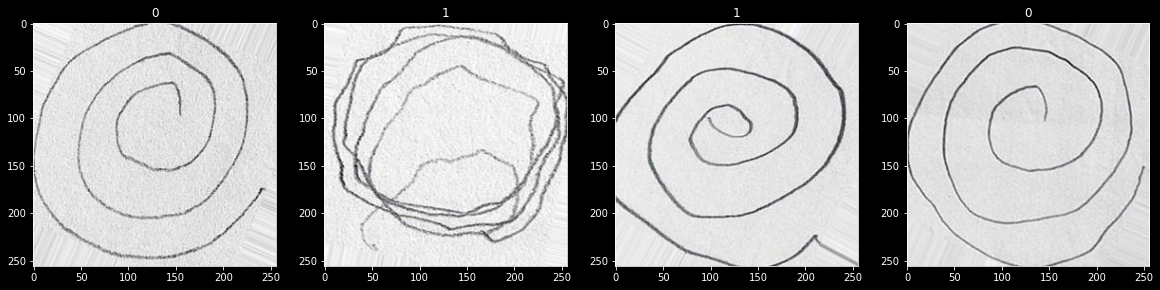

In [ ]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
train = train.map(lambda x,y: (x/255, y))

In [ ]:
train.as_numpy_iterator().next()

(array([[[[0.8509804 , 0.8509804 , 0.8509804 ],
          [0.85490197, 0.85490197, 0.85490197],
          [0.85882354, 0.85882354, 0.85882354],
          ...,
          [0.90588236, 0.90588236, 0.90588236],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8784314 , 0.8784314 , 0.8784314 ]],
 
         [[0.88235295, 0.88235295, 0.88235295],
          [0.8784314 , 0.8784314 , 0.8784314 ],
          [0.8745098 , 0.8745098 , 0.8745098 ],
          ...,
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.88235295, 0.88235295, 0.88235295]],
 
         [[0.9137255 , 0.9137255 , 0.9137255 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.89411765, 0.89411765, 0.89411765],
          ...,
          [0.8862745 , 0.8862745 , 0.8862745 ],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.89411765, 0.89411765, 0.89411765]],
 
         ...,
 
         [[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.88627

### Testing Data

In [ ]:
test = tf.keras.utils.image_dataset_from_directory(test_dir)
data_iterator = test.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


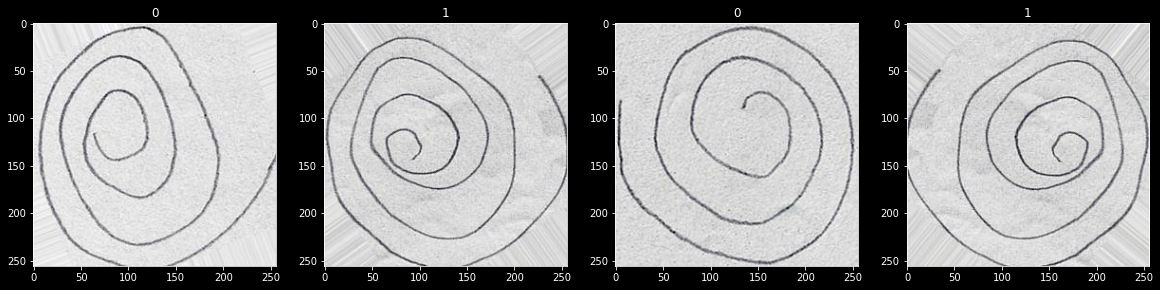

In [ ]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
test = test.map(lambda x,y: (x/255, y))

In [ ]:
test.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.8980392 , 0.8980392 ],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          ...,
          [0.89411765, 0.89411765, 0.89411765],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8862745 , 0.8862745 , 0.8862745 ]],
 
         [[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.89411765, 0.89411765, 0.89411765]],
 
         [[0.9254902 , 0.9254902 , 0.9254902 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.8862745 , 0.8862745 , 0.8862745 ],
          ...,
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.8901961 , 0.8901961 , 0.8901961 ],
          [0.8862745 , 0.8862745 , 0.8862745 ]],
 
         ...,
 
         [[0.9019608 , 0.9019608 , 0.9019608 ],
          [0.89803

### Validation Data

In [ ]:
valid = tf.keras.utils.image_dataset_from_directory(validation_dir)
data_iterator = valid.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


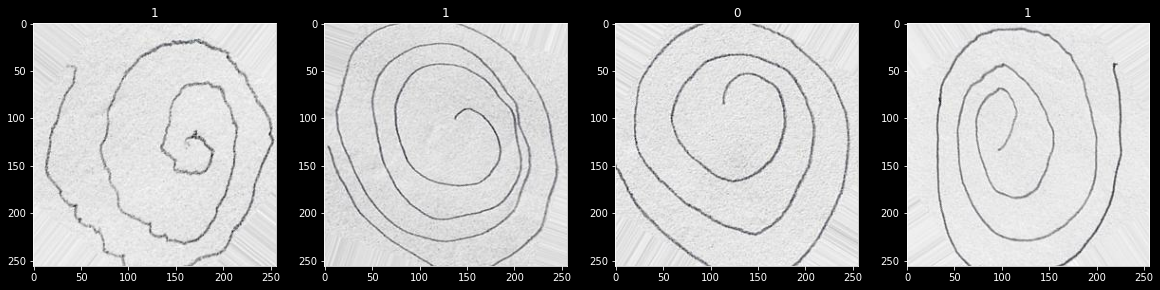

In [ ]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
valid = valid.map(lambda x,y: (x/255, y))

In [ ]:
valid.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.8980392 , 0.8980392 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          ...,
          [0.9137255 , 0.9137255 , 0.9137255 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         [[0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.9019608 , 0.9019608 , 0.9019608 ],
          ...,
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.9098039 , 0.9098039 , 0.9098039 ]],
 
         [[0.9098039 , 0.9098039 , 0.9098039 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.90588236, 0.90588236, 0.90588236],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.90588236, 0.90588236, 0.90588236],
          [0.91764706, 0.91764706, 0.91764706]],
 
         ...,
 
         [[0.9254902 , 0.9254902 , 0.9254902 ],
          [0.92549

---

In [ ]:
img_path = os.path.join(cur_dir,'spiral/parkinson/')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)


# Parkinson training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_p_dir, images)
#     shutil.copyfile(src, dst)
    

# Parkinson training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_p_dir, images)
#     shutil.copyfile(src, dst)



# Parkinson training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_p_dir, images)
#     shutil.copyfile(src, dst)
    

In [ ]:
a, b, numbers = next(os.walk(train_p_dir))
print(len(numbers))

1000


In [ ]:
a, b, numbers = next(os.walk(test_p_dir))
print(len(numbers))

500


In [ ]:
a, b, numbers = next(os.walk(validation_p_dir))
print(len(numbers))

500


## Designing the MODEL

In [ ]:
model = Sequential()

# Feature Layer
model.add(Conv2D(2, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(4, (3, 3), activation='relu' ))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

#Hidden Layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 2)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 4)       76        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 4)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dropout (Dropout)           (None, 15376)             0

In [ ]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [tensorboard_callback,reduce_learningrate]

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.000001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train,
                   epochs=5,
                   validation_data=valid,
                   callbacks=reduce_learningrate,
                   batch_size = 15)


Epoch 1/61
63/63 [==============================] - 7s 98ms/step - loss: 0.6925 - accuracy: 0.5530 - val_loss: 0.6914 - val_accuracy: 0.6210 - lr: 1.0000e-05
Epoch 2/61
63/63 [==============================] - 6s 96ms/step - loss: 0.6903 - accuracy: 0.6685 - val_loss: 0.6889 - val_accuracy: 0.6840 - lr: 1.0000e-05
Epoch 3/61
63/63 [==============================] - 6s 96ms/step - loss: 0.6869 - accuracy: 0.7135 - val_loss: 0.6839 - val_accuracy: 0.7020 - lr: 1.0000e-05
Epoch 4/61
63/63 [==============================] - 6s 95ms/step - loss: 0.6795 - accuracy: 0.7560 - val_loss: 0.6721 - val_accuracy: 0.7600 - lr: 1.0000e-05
Epoch 5/61
63/63 [==============================] - 6s 97ms/step - loss: 0.6627 - accuracy: 0.7790 - val_loss: 0.6455 - val_accuracy: 0.7920 - lr: 1.0000e-05
Epoch 6/61
63/63 [==============================] - 6s 96ms/step - loss: 0.6291 - accuracy: 0.7735 - val_loss: 0.6028 - val_accuracy: 0.8010 - lr: 1.0000e-05
Epoch 7/61
63/63 [==============================] - 

### Model Evaluation

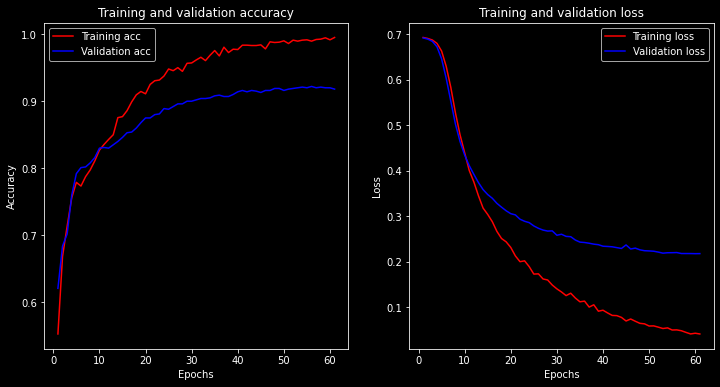

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
    
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [150]:
model = Sequential()

# Feature Layer
model.add(Conv2D(2, (15, 15), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (10, 10), activation='relu',strides=(2,2) ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))

#Hidden Layers

model.add(Dense(512, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 242, 242, 2)       1352      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 121, 121, 2)      0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 121, 121, 2)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 56, 56, 4)         804       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 28, 28, 4)        0         
 g2D)                                                            
                                                                 
 dropout_51 (Dropout)        (None, 28, 28, 4)       

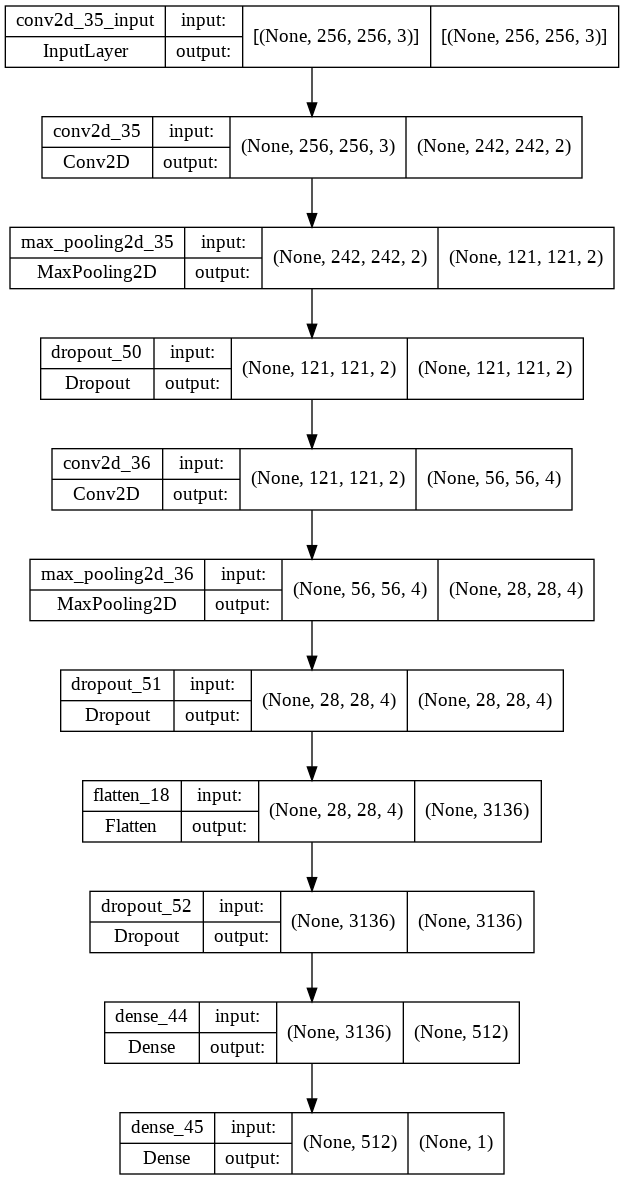

In [151]:
from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

plot_model(model, show_shapes=True, show_layer_names=True)

In [152]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

reduce_learningrate = ReduceLROnPlateau(
                              monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.00001)
early_stopping = tf.keras.callbacks.EarlyStopping(
                              monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              mode='auto',
                              baseline=None,
                              restore_best_weights=True
                          )

cur_dir = os.getcwd()
ckpt_path = os.path.join(cur_dir, 'checkpoint')

if not os.path.exists(ckpt_path):
    os.makedirs(ckpt_path)

cp_path = os.path.join(ckpt_path, "Checkpoint")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cp_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


callbacks_list = [reduce_learningrate, checkpoint_callback]

In [153]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [154]:
history = model.fit(train,
                   epochs = 101,
                   validation_data = valid,
                   callbacks = callbacks_list,
                   batch_size = 18)


Epoch 1/101
63/63 [==============================] - 7s 100ms/step - loss: 0.7735 - accuracy: 0.5115 - val_loss: 0.6914 - val_accuracy: 0.5140 - lr: 1.0000e-05
Epoch 2/101
63/63 [==============================] - 7s 107ms/step - loss: 0.7473 - accuracy: 0.4760 - val_loss: 0.6912 - val_accuracy: 0.5130 - lr: 1.0000e-05
Epoch 3/101
63/63 [==============================] - 7s 107ms/step - loss: 0.7120 - accuracy: 0.5130 - val_loss: 0.6910 - val_accuracy: 0.5110 - lr: 1.0000e-05
Epoch 4/101
63/63 [==============================] - 7s 100ms/step - loss: 0.7126 - accuracy: 0.4920 - val_loss: 0.6902 - val_accuracy: 0.5500 - lr: 1.0000e-05
Epoch 5/101
63/63 [==============================] - 7s 109ms/step - loss: 0.6988 - accuracy: 0.5045 - val_loss: 0.6899 - val_accuracy: 0.5600 - lr: 1.0000e-05
Epoch 6/101
63/63 [==============================] - 7s 101ms/step - loss: 0.6980 - accuracy: 0.4890 - val_loss: 0.6896 - val_accuracy: 0.5760 - lr: 1.0000e-05
Epoch 7/101
63/63 [=====================

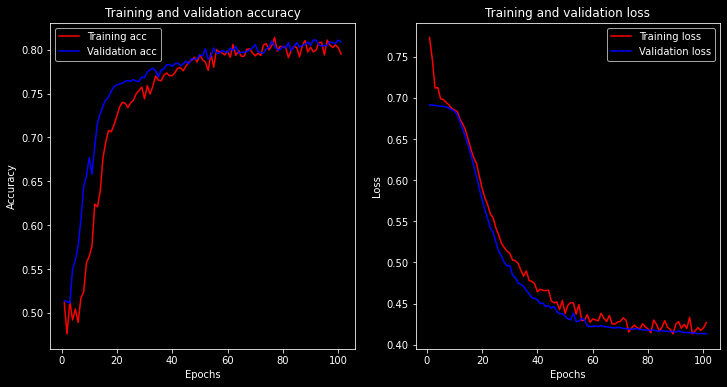

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# cur_dir = os.getcwd()
# graph_path = os.path.join(cur_dir, 'graph')

# if not os.path.exists(graph_path):
#     os.makedirs(graph_path)

# plot = os.path.join(graph_path,'model_eval.png' )

# plt.savefig(plot)

In [ ]:
!ls

100_spiral_model.h5  graph  model  spiral  spiral_data


In [ ]:
! ls graph

saved_figure.png


In [156]:
loss, accuracy = model.evaluate(train, verbose=1)
print(f'Training Accuracy = {accuracy*100}')

63/63 [==============================] - 4s 61ms/step - loss: 0.3813 - accuracy: 0.8240
Training Accuracy = 82.40000009536743


In [157]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f'Testing Accuracy = {accuracy*100}')

32/32 [==============================] - 2s 53ms/step - loss: 0.4236 - accuracy: 0.7960
Testing Accuracy = 79.60000038146973


### Test on Data

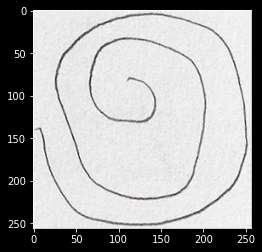

In [158]:
img_path = os.path.join(cur_dir, 'spiral/healthy/healthy_V01HE01_0_1119.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

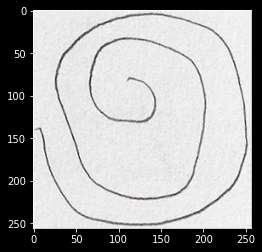

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.18696976]]


In [161]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy


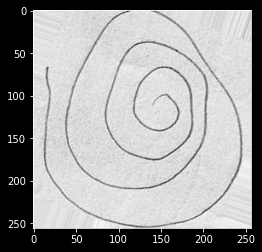

In [162]:
img_path = os.path.join(cur_dir, 'spiral/parkinson/parkinson_V01PE01_0_1319.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

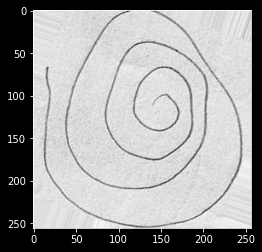

In [163]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [164]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.63734144]]


In [165]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


### Saving the model

In [169]:
cur_dir = os.getcwd()
model_path = os.path.join(cur_dir, 'model2')

if not os.path.exists(model_path):
    os.makedirs(model_path)

json_model = os.path.join(model_path, 'model_structure.json')
weight_model = os.path.join(model_path, 'model_weights.h5')

model_structure = model.to_json()
with open(json_model ,"w") as f :
    f.write(model_structure)

model.save_weights(weight_model)

In [170]:
! ls

100_spiral_model.h5  graph  model2	    model.png  spiral_data
checkpoint	     model  model_plot.png  spiral


In [171]:
! ls model2

model_structure.json  model_weights.h5
